# ** 5 Python Visual Analysis**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. df.column이름
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; map, reduce, lambda, filter**
1. map & lambda : map(lambda x : str(x), [list])
1. map & lambda : list(map(lambda x : str(x), [list]))
1. map & lambda : <strike>[ map(lambda x : str(x), data) ]</strike>
1. Series & lambda : Series.apply(lambda x : str(x))
1. filter & lambda : list(filter(lambda x : x % 2 == 0,  data))
1. <strike>filter</strike> & DataFrame : DataFrame[ Series % 2 == 0 ]
1. reduce & lambda : reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])      # 데이터 차원축소

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

### **review &nbsp; Matplotlib**
1. DataFrame.loc['시작날짜':'종료날짜', :] : 주소 이름을 활용하여 인덱싱
1. DataFrame.iloc[1:10, : ] # 주소값으로 인덱싱
1. Series.plot(kind='line')  **# 'bar'**
1. Series.resample().plot()
1. Series.rolling().plot()
1. Series.ix['2018-01':'2018-03'].plot()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.plot(x축,y축,lw=1.5,label=); &nbsp;&nbsp; plt.legend(loc=); &nbsp;&nbsp; plt.show()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.subplot(121); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plt.subplot(122); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plot.show()


<br>
## **1 Review Ploting**
matplotlib

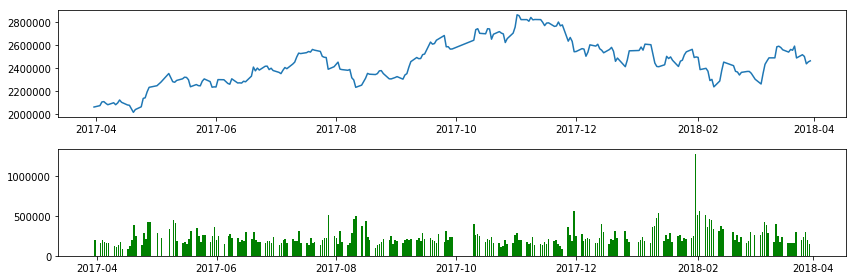

In [27]:
%matplotlib inline
# 출처 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot2grid.html
#  matplotlib.pyplot.subplot2grid( (row, col), (시작점), rowspan=1, colspan=1, fig=None, **kwargs)
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from googlefinance.get import get_data

# Canvas 크기값 설정
fig      = plt.figure(figsize=(12, 4)) 
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=2, colspan=4)
bot_axes = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)

ss_history = get_data('KRX:005930', period='1Y')
top_axes.plot(ss_history.index, ss_history.Close, label='Adjusted Close')
bot_axes.bar( ss_history.index, ss_history.Volume, color='green')
plt.tight_layout() # 자동으로 최대크기의 그림으로 출력
plt.show()

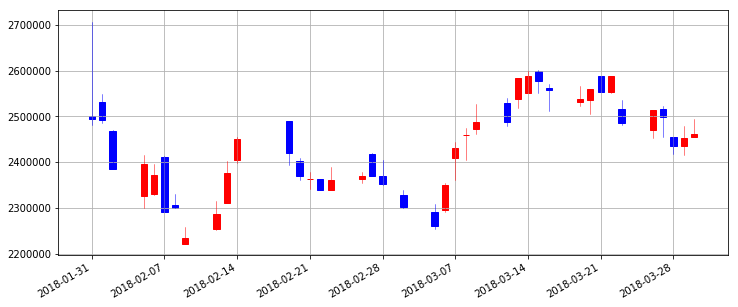

In [35]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import matplotlib.dates as mdates
from googlefinance.get import get_data

fig, ax    = plt.subplots(figsize=(12, 5))
ss_history = get_data('KRX:005930', period='2M')
data_stock = ss_history.iloc[:,1:-1].reset_index()
data_stock['Date'] = data_stock['Date'].map(mdates.date2num)   # Date 컬럼을 matplot 포맷으로 변환

mpf.candlestick_ohlc(ax, data_stock.values, 
                     width=0.6, colorup='r', colordown='b')    # UP:red, Down:blue
ax.xaxis_date(); ax.autoscale_view(); fig.autofmt_xdate()      # x 축에 날짜를 추가한다
plt.grid(True)

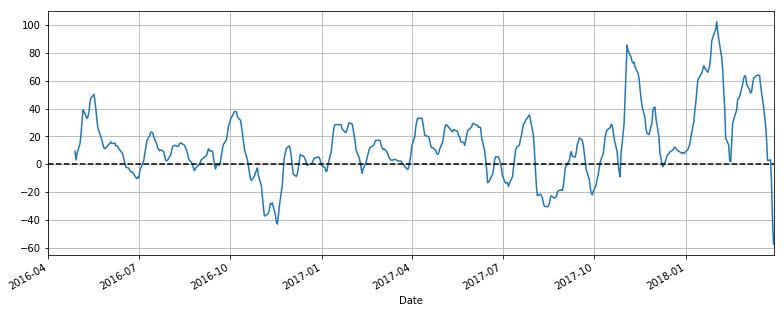

In [31]:
# import Data
import requests, datetime
import pandas as pd
import matplotlib.pyplot as plt
from googlefinance.get import get_data
code = 'NASDAQ:AMZN'
stock_history = get_data(code, period='2Y')
stock_history['MA_5']  = stock_history['Close'].rolling(window=5, center=False).mean()
stock_history['MA_20'] = stock_history['Close'].rolling(window=20, center=False).mean()
stock_history['diff']  = stock_history['MA_5'] - stock_history['MA_20']
stock_history['diff'].plot(figsize=(13,5))
plt.axhline(y=0, linestyle = '--', color = 'k')
plt.grid()
# plt.plot(result.ix[result.buy == True].index,  result[result.buy  == True].ma5, '^', label='Buy')
# plt.plot(result.ix[result.sell == True].index, result[result.sell == True].ma5, 'v', label='Sell')


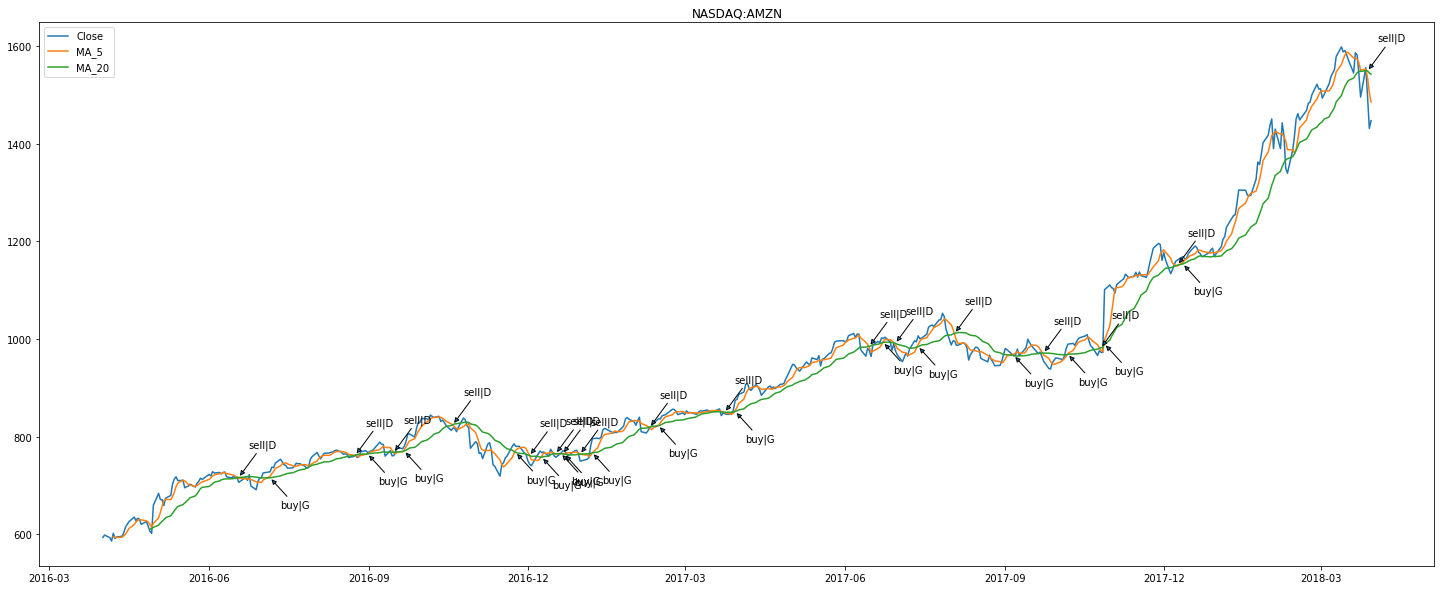

In [19]:
plt.subplots(1,1, figsize=(25,10))
plt.plot(stock_history.index, stock_history['Close'], label = 'Close')
plt.plot(stock_history.index, stock_history['MA_5'], label = 'MA_5')
plt.plot(stock_history.index, stock_history['MA_20'], label = 'MA_20')
plt.title(code)
plt.legend(loc='best')

prev_key = prev_val = 0
for key, val in stock_history['diff'][1:].iteritems():
    if val == 0: continue
        
    elif val * prev_val < 0 and val > prev_val: #print('GOLD', key, val)
        plt.annotate('buy|G', xy = (key, stock_history['MA_20'][key]), xytext=(10,-30), 
                     textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
    
    elif val * prev_val < 0 and val < prev_val: #print('DEAD', key, val)
        plt.annotate('sell|D', xy = (key, stock_history['MA_20'][key]), xytext=(10,30),
                     textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val

<br>
## **2 Back Testing**
! pip install pinkfish
1. OpenSorce 문제점과 의 한계
1. https://github.com/ematvey/pybacktest
1. http://nbviewer.jupyter.org/github/ematvey/pybacktest/blob/master/examples/tutorial.ipynb
1. zipline 이라는 오래된 모듈이 있지만, Pandas 0.22를 반영못하고, Yahoo API가 막힘으로써 전혀 작동을 못함
1. https://github.com/fja05680/pinkfish/blob/master/examples/golden-cross-plus/strategy.ipynb

In [29]:
from googlefinance.get import get_data
ohlc = get_data('KRX:005930','2M')

short_ma = 5   # 단기 5일  이동평균
long_ma = 20   # 장기 20일 이동평균

# 사용할 signal 데이터를 Series로 추출한다
# buy == cover , sell == short
ms = ohlc.Close.rolling(short_ma).mean()
ml = ohlc.Close.rolling(long_ma).mean()
ohlc['buy']  = (ms > ml) & (ms.shift() < ml.shift())  # 이동평균선 교차상승
ohlc['sell'] = (ms < ml) & (ms.shift() > ml.shift())  # 이동평균선 교차하락
ohlc = ohlc.iloc[:,[0,4,6,7]]
print(ohlc[ohlc.sell == True], '\n',ohlc[ohlc.buy == True])

                  Code      Close    buy  sell
Date                                          
2018-03-29  KRX:005930  2452000.0  False  True 
                   Code      Close   buy   sell
Date                                          
2018-03-08  KRX:005930  2460000.0  True  False


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
#from talib.abstract import *
import pinkfish as pf
#import strategy

In [ ]:
import pinkfish as

In [ ]:
# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [18]:
type(list(set(ohlc.buy))[0])

bool

,Code,Open,High,Low,Close,Volume,buy,sell
Date,,,,,,,,
2018-03-29,KRX:005930,2435000.0,2478000.0,2416000.0,2452000.0,192863,False,True


In [5]:
from pybacktest import Backtest
bt = Backtest(locals())
bt

Backtest(Unknown, 2018-31-03 20:41 KST)

In [8]:


bt.summary()



---------------------------------------------
|  Backtest(Unknown, 2018-31-03 20:41 KST)  |
---------------------------------------------



TypeError: can't pickle traceback objects

In [7]:
print(list(filter(lambda x: not x.startswith('_'), dir(bt))))
print('\n>  bt.signals\n%s' % bt.signals.tail())
print('\n>  bt.trades\n%s' % bt.trades.tail())
print('\n>  bt.positions\n%s' % bt.positions.tail())
print('\n>  bt.equity\n%s' % bt.equity.tail())
print('\n>  bt.trade_price\n%s' % bt.trade_price.tail())

['dataobj', 'default_price', 'eqplot', 'equity', 'name', 'ohlc', 'plot_equity', 'plot_trades', 'positions', 'prices', 'report', 'run_time', 'signals', 'sigplot', 'stats', 'summary', 'trade_price', 'trades', 'trdplot']


AttributeError: 'function' object has no attribute 'tail'

In [1]:
from zipline.algorithm import TradingAlgorithm

ImportError: cannot import name 'handle_non_market_minutes'

## **1. Zipline 수정하기**
1. 현재는 Miniconda로 설치후,
1. https://www.youtube.com/watch?v=Fg-hHwlb2Ik ikernel에 quant를 추가해서 실행
1. Python 3.4에서 실행중

1. zipline 수정하는 방법(그런데 잘 안된다... ㅜㅜㅜ)
1. https://github.com/quantopian/zipline/issues/2043
1. ! pip install zipline --no-cache-dir
1. ! pip install pandas --upgrade
1. cd /usr/local/lib/python3.5/dist-packages/zipline/_protocol.pyx
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/algorithm.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/performance/tracker.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/risk/trading.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/data/data_portal.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/data/history_loader.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/data/loader.py
        data_reader
1. cd /usr/local/lib/python3.5/dist-packages/zipline/data/benchmarks.py
        from)) data = pd_reader.DataReader(symbol,'google',first_date,last_date)
        to)) data = pd_reader.DataReader(symbol,'yahoo',first_date,last_date)

In [4]:
from cached_property import cached_property

ImportError: No module named 'cached_property'

In [4]:
from pandas._libs.tslib import normalize_date

In [8]:
normalize_date('2018-02')

TypeError: Unrecognized type: <class 'str'>

In [2]:
from pandas._libs.tslib import normalize_date

In [1]:
import warnings
warnings.warn("The pandas.tslib module is deprecated and will be "
              "removed in a future version.", FutureWarning, stacklevel=2)
from pandas._libs.tslib import (Timestamp, Timedelta,
                               NaT, NaTType, OutOfBoundsDatetime)

/home/markbaum/Python/django/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import zipline

/home/markbaum/Python/django/lib/python3.6/site-packages/zipline/utils/calendars/exchange_calendar_ice.py:10: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import Timestamp


ImportError: cannot import name normalize_date

In [2]:
import zipline

/home/markbaum/Python/django/lib/python3.6/site-packages/zipline/utils/calendars/exchange_calendar_ice.py:10: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import Timestamp


ImportError: cannot import name normalize_date

In [1]:
import zipline

/home/markbaum/Python/django/lib/python3.6/site-packages/zipline/utils/calendars/exchange_calendar_ice.py:10: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import Timestamp


ModuleNotFoundError: No module named 'pandas.tseries.tools'

In [43]:
stock = get_data('KRX:005930', period='10D')
stock

,Code,Open,High,Low,Close,Volume
Date,,,,,,


In [44]:
a = '10D'

In [47]:
a[-1]

'D'

## Pandas 데이터 분석
기초 (Series (1 dim), DataFrame (2 dim))

    <profit>
    053800.KQ 안랩 잘 맞음

    <fails>
    005930.KS 삼성전자 무조건 손실
    001380.KS SG충방 (막판은 손실이 크다)

In [1]:
# 안랩 자료를 기초로 분석실행  (골든크로스는 테마주가 잘 맞는다 -ㅜ.)
code_num = "000660.KS"

### Series

In [2]:
import pandas as pd
from pandas import Series, DataFrame
kakao = Series([92600, 92100, 91200, 92030]); kakao

0    92600
1    92100
2    91200
3    92030
dtype: int64

### Series (간단한 연산에 용이)
Indexing & Calculating Series Data

In [3]:
# Series 는 index 로 value를 호출가능!!!
kakao[3]

92030

### DataFrame

In [4]:
from pandas import DataFrame
raw_data= {'col0' : [1,2,3,4],
           'col1' : [10,20,30,40],
           'col2' : [100,200,300,400]} 
df = DataFrame(raw_data) ; df

,col0,col1,col2
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [5]:
# Change the Column names {Dict로 딱딱 맞아야 변경}
df = df.rename(columns={'col0':'Open', 'col1':'Low','col2':'Close'}); df

,Open,Low,Close
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [6]:
# Change the Index names
date = ['2017-7-1','2017-7-2','2017-7-3','2017-7-4']
df.index = date
df.index = pd.to_datetime(df.index) # change index format
df

,Open,Low,Close
2017-07-01,1,10,100
2017-07-02,2,20,200
2017-07-03,3,30,300
2017-07-04,4,40,400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2017-07-01 to 2017-07-04
Data columns (total 3 columns):
Open     4 non-null int64
Low      4 non-null int64
Close    4 non-null int64
dtypes: int64(3)
memory usage: 128.0 bytes


## DataFrame
Stock Price

In [8]:
from pandas_datareader import get_data_yahoo, get_data_google
#samsung = get_data_google(code_num,'2014-1-1','2017-7-17')
samsung = get_data_yahoo(code_num,'2014-1-1','2017-7-17')
print(samsung.tail(4))

               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2017-07-11  67400.0  69000.0  66900.0  69000.0    69000.0  3187332
2017-07-12  68700.0  69500.0  68400.0  68900.0    68900.0  3462150
2017-07-13  69500.0  71900.0  69200.0  70600.0    70600.0  5432312
2017-07-14  71400.0  72200.0  70700.0  71000.0    71000.0  1917636


In [9]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 872 entries, 2014-01-02 to 2017-07-14
Data columns (total 6 columns):
Open         872 non-null float64
High         872 non-null float64
Low          872 non-null float64
Close        872 non-null float64
Adj Close    872 non-null float64
Volume       872 non-null int64
dtypes: float64(5), int64(1)
memory usage: 47.7 KB


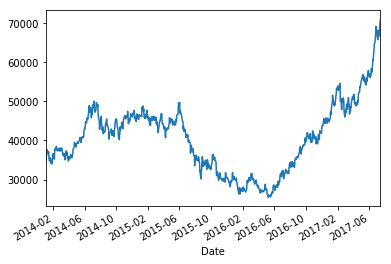

In [10]:
%matplotlib inline
samsung.Close.plot(kind='line')

In [11]:
# Series : 같은 인덱스 위치의 값끼리 더한다
sam = samsung.Open + samsung.Volume
sam[:10]

Date
2014-01-02     4540201.0
2014-01-03     3902519.0
2014-01-06     5526096.0
2014-01-07     3403204.0
2014-01-08     6580479.0
2014-01-09     4495836.0
2014-01-10     4700289.0
2014-01-13     2212180.0
2014-01-14     2411156.0
2014-01-15    11350773.0
dtype: float64

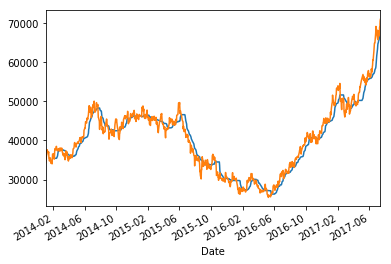

In [12]:
samsung.Close.rolling(window=20).median().plot(kind='line')
samsung.Close.plot(kind='line')

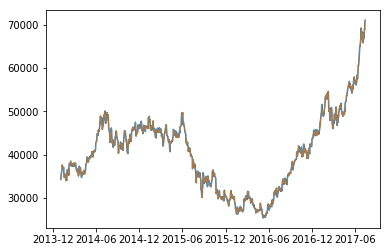

In [13]:
import matplotlib.pyplot as plt
plt.plot(samsung.Close, label='Close')
plt.plot(samsung.Close, label='Close',linewidth = 1, alpha = 100)

## DataFrame
DataFrame[ indexing / Boolean 조건 ]

In [14]:
# samsung[ index 값 인덱싱 ]
# samsung[ Boolean 조건결과 인덱싱 ]
samsung[ samsung['Close'] > 2409000 ]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [15]:
# 이동평균값 컬럼에 삽입
ma20 = samsung.Close.rolling(window=20).mean()
ma60 = samsung.Close.rolling(window=60).mean()
ma120 = samsung.Close.rolling(window=120).mean()
samsung.insert( len(samsung.columns), "MA20", ma20)
samsung.insert( len(samsung.columns), "MA60", ma60)
samsung.insert( len(samsung.columns), "MA120", ma120)
samsung[::100]

,Open,High,Low,Close,Adj Close,Volume,MA20,MA60,MA120
Date,,,,,,,,,
2014-01-02,37100.0,37350.0,35550.0,34294.761719,35550.0,4503101,NaN,NaN,NaN
2014-05-29,42700.0,42900.0,42450.0,41095.828125,42600.0,2788250,40140.783399,37831.957292,NaN
2014-10-28,45150.0,46100.0,45000.0,44375.777344,46000.0,2907131,43343.557227,43146.599154,43956.135645
2015-03-25,48000.0,48350.0,47850.0,46893.886719,48300.0,1830867,44731.235352,45699.613542,45417.943978
2015-08-17,37300.0,37400.0,35650.0,34612.156250,35650.0,3808016,35835.474805,40682.632813,42478.371192
2016-01-12,28600.0,28900.0,27700.0,27434.611328,27800.0,4418384,29696.428809,30432.281055,32497.541911
2016-06-10,29150.0,29200.0,28700.0,28618.839844,29000.0,2413698,27187.897266,27511.914941,28246.208822
2016-11-04,41150.0,41400.0,40850.0,40658.488281,41200.0,2600930,40818.852930,38350.066927,34209.792513
2017-03-30,51100.0,51500.0,50200.0,50900.000000,50900.0,2204243,49095.000000,49850.833333,46092.743197


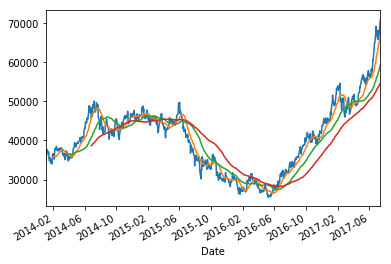

In [16]:
samsung.Close.plot(kind='line')
samsung.MA20.plot(kind='line')
samsung.MA60.plot(kind='line')
samsung.MA120.plot(kind='line')

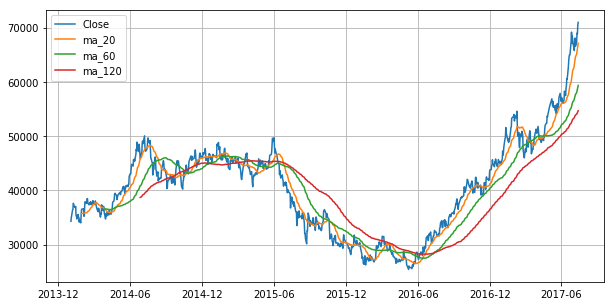

In [17]:
import matplotlib.pyplot as plt
plt.subplots(1,1, figsize=(10,5))
plt.plot(samsung.Close, label='Close')
plt.plot(samsung.MA20, label='ma_20')
plt.plot(samsung.MA60, label='ma_60')
plt.plot(samsung.MA120, label='ma_120')
plt.legend(loc='best')
plt.grid()

## Zipline 
백테스팅 주식거래 시뮬레이터 (by 삼성전자)

https://github.com/quantopian/zipline/issues/2043

### 1 초기값 설정으로 백테스팅
BackTesting by Default

In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order, symbol
from zipline.algorithm import TradingAlgorithm

/home/markbaum/Python/django/lib/python3.6/site-packages/zipline/utils/calendars/exchange_calendar_ice.py:10: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import Timestamp


ImportError: cannot import name 'normalize_date'

In [19]:
# functions
# 초기값 지정 : 초기 투자금액 및 수수료
def initialize(context):        
    pass
# 거래알고리즘 (거래일 마다 이 함수를 적용)
def handle_data(context, data): 
    order(symbol('Close'), 1) # order 주문시행함수 (1주씩 매일 거래) 

    미국 자료는 잘 되는데, 국내 코스피, 코스닥 자료는 작동이 잘 안된다 ㅠㅠ.. (index 오류라는데 정말 ..??)
    주식거래일이 미국과 달라서 생기는 오류로 추정 중
    http://mtsparrow.blogspot.kr/2016/07/zipline.html

In [20]:
# 미국의 주식데이터에 value만 국내기업으로 교체
# 국내 거래자료는 KeyError: 'the label [2000-01-03 00:00:00] is not in the [index]'
def zipline_ks(code_ks,start,end):
    from pandas_datareader import get_data_google, get_data_yahoo
    import datetime; import numpy as np

    # 미국 주식 껍데이 / 국내기업 자료 호출
    data  = get_data_yahoo("AAPL", start, end)
    df = get_data_yahoo(code_ks, start, end)

    data = data[['Close']]
    #data.columns = ['Close']
    data = data.tz_localize("UTC")
    
    # 국내 기업의 자료를 편집
    df = df[['Close']]     # 국내기업의 'Close'종가 목록만 추출 
    data = data[len(data) - len(df):]  #데이터 프레임의 row 수를 맞추는 작업
    data['Close'] = np.where(1, df['Close'], df['Close'])    #DB에서 가져온 df의 Close 컬럼을 AAPL의 종가 컬럼으로 교체
    return data

In [24]:
data = zipline_ks(code_num,'2011-1-1','2017-7-1')

[]

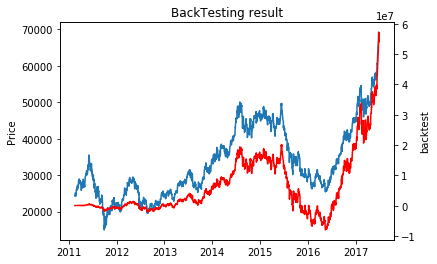

In [25]:
# 백 테스팅 시행
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)  # 거래 알고리즘 정의
result = algo.run(data)  # 매일 거래를 시행 (수수료를 제거한 가격값)

# Visualization
fig, ax1 = plt.subplots()
plt.plot(data.Close); plt.ylabel('Price'); 
ax2 = ax1.twinx()
plt.plot(result.index, result.portfolio_value, 'r'); plt.ylabel('backtest')
plt.title('BackTesting result')
plt.plot()  #plt.savefig('.png')

In [26]:
result.portfolio_value[::100]

2011-02-15 21:00:00+00:00    1.000000e+05
2011-07-11 20:00:00+00:00    8.160960e+04
2011-11-30 21:00:00+00:00   -4.595174e+05
2012-04-25 20:00:00+00:00    1.068678e+06
2012-09-17 20:00:00+00:00   -9.326726e+05
2013-02-12 21:00:00+00:00    5.299866e+05
2013-07-08 20:00:00+00:00    3.644055e+06
2013-11-26 21:00:00+00:00    4.484778e+06
2014-04-23 20:00:00+00:00    8.420616e+06
2014-09-15 20:00:00+00:00    1.432182e+07
2015-02-06 21:00:00+00:00    1.570894e+07
2015-07-01 20:00:00+00:00    1.353080e+07
2015-11-20 21:00:00+00:00   -1.609234e+06
2016-04-18 20:00:00+00:00   -5.654507e+06
2016-09-08 20:00:00+00:00    6.408877e+06
2017-02-01 21:00:00+00:00    2.932417e+07
2017-06-26 20:00:00+00:00    5.446587e+07
Name: portfolio_value, dtype: float64

### 2 이동평균선 전략 백테스트
<p>by Golden cross (강세진입) / Dead cross (약세진입)</p></br>
<p>단기 (5일) // 중장기 (20/60일) 이동평균선 흐름</p></br>
(골든 기간동안 매수/  데드 기간동안 매도를 지속)

In [27]:
from zipline.api import order_target, record, symbol
# 초기값 지정 
def initialize(context):        
    context.i = 0                 # i 는 거래일 수
    context.sym = symbol('Close')  # sym 참조 데이터 심볼지정

In [28]:
# 거래알고리즘 (거래일 마다 이 함수를 적용)
def handle_data(context, data): 
    context.i += 1                 # i 는 거래일 수
    if context.i < 20:             # 5일과 20일 이동평균선 시뮬레이션 시작조건
        return
    ma5 = data.history(context.sym, 'price', 5, '1d').mean()  # 5일 이동평균데이터
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()  # 20일 이동평균데이터    
    if ma5 > ma20:
        order_target(context.sym, 1)  # 매수조건 (5일 이동평균값이 20일을 앞지를 떄)
    else:
        order_target(context.sym, -1) # 매도조건
    # record() : 이동평균데이터를 저장 - 추후 다른 데이터 분석시 재활용에 용이하도록 하기 위해서 (시각화에 활용)
    record(Close = data.current(context.sym, "price"), ma5=ma5, ma20=ma20)

In [29]:
# 백 테스팅 시행
from time import time; t0 = time()
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)  # 거래 알고리즘 정의
result = algo.run(data)  # 매일 거래를 시행 (수수료를 제거한 가격값)
print('Done!', int(time()-t0), 'sec')

Done! 12 sec


### Visualization

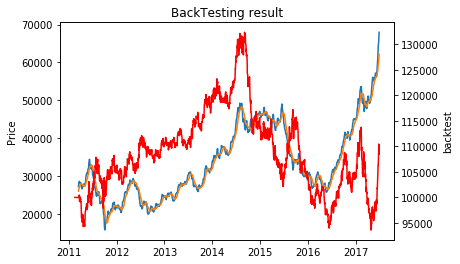

In [30]:
# 주가의 이동평균선 그래프
fig, ax1 = plt.subplots()
plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20); plt.ylabel('Price'); 

# 수익률 그래프
ax2 = ax1.twinx()
plt.plot(result.index, result.portfolio_value, 'r'); plt.ylabel('backtest')
plt.title('BackTesting result')
plt.plot(); #plt.savefig('.png')

In [31]:
print(type(result))
result[::500]

<class 'pandas.core.frame.DataFrame'>


,Close,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-02-15 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.002923,NaN,NaN,0.0,100000.000000,0.000000,...,0.0,0.0,0,NaN,100000.000000,0.000000,0.000000,1,[],0.0361
2013-02-12 21:00:00+00:00,25323.130859,0.105343,0.102618,0.056108,0.139324,0.702159,-0.005271,0.0,84938.681640,25323.130859,...,0.0,0.0,0,0.794619,84938.681640,24985.492188,24985.492188,501,[],0.0202
2015-02-06 21:00:00+00:00,45680.277344,0.101623,0.116683,0.034030,0.540508,0.503204,-0.005044,0.0,65988.060548,45680.277344,...,0.0,0.0,0,0.473350,65988.060548,45631.734375,45631.734375,1001,[],0.0195
2017-02-01 21:00:00+00:00,51700.000000,0.106908,0.108532,0.023528,0.705913,0.418801,-0.003157,0.0,59153.228514,51700.000000,...,0.0,0.0,0,0.310083,59153.228514,51600.000000,51600.000000,1501,[],0.0248


### 3 이동평균선 전략 백테스트 2
<p>by Golden cross (강세진입) / Dead cross (약세진입)</p></br>
<p>단기 (5일) // 중장기 (20/60일) 이동평균선 흐름</p></br>
(골든 시점에만 매수/  데드 시점에만 매도)

In [32]:
# 초기값 지정 
def initialize(context):        
    context.i = 0                  # i 는 거래일 수
    context.sym = symbol('Close')  # sym 참조 데이터 심볼지정
    context.hold = False           # 매수조건 만족기간 ('hold') 동안 == 거래 않는다

In [33]:
# 거래알고리즘 (거래일 마다 이 함수를 적용)
def handle_data(context, data): 
    context.i += 1                 # i 는 거래일 수
    if context.i < 20:             # 5일과 20일 이동평균선 시뮬레이션 시작조건
        return
    buy  = False
    sell = False
    ma5 = data.history(context.sym, 'price', 5, '1d').mean()    # 5일 이동평균데이터
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()  # 20일 이동평균데이터    
    if ma5 > ma20 and context.hold == False : # 동일조건 유지시 False (매매 않는다)
        order_target(context.sym, 100)        # 매수조건시 100주를 매수
        context.hold = True
        buy = True
    elif ma5 < ma20 and context.hold == True : # 동일조건 유지시 False (매매 않는다)
        order_target(context.sym, -100)        # 매수조건시 100주를 매수
        context.hold = False                   # 주식을 보유하지 않는다
        sell = True
    # record() : 이동평균데이터를 저장 - 추후 다른 데이터 분석시 재활용에 용이하도록 하기 위해서 (시각화에 활용)
    record(Close = data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)

In [34]:
# 백 테스팅 시행
from time import time; t0 = time()
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)  # 거래 알고리즘 정의
result = algo.run(data)  # 매일 거래를 시행 (수수료를 제거한 가격값)
print('Done!', int(time()-t0), 'sec')

Done! 12 sec


### Visualization

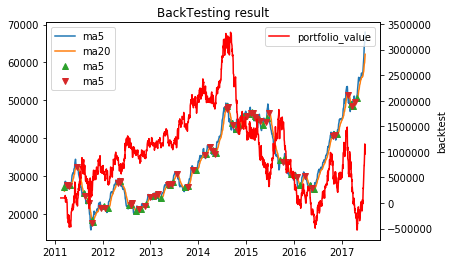

In [35]:
fig, ax1 = plt.subplots()
plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20)
plt.plot(result.ix[result.buy == True].index, result[result.buy == True].ma5, '^')
plt.plot(result.ix[result.sell == True].index, result[result.sell == True].ma5, 'v')
plt.legend(loc='best')

ax2 = ax1.twinx()
plt.plot(result.index, result.portfolio_value, 'r'); plt.ylabel('backtest')
plt.title('BackTesting result') ; plt.legend(loc='best')
plt.plot(); #plt.savefig('.png')

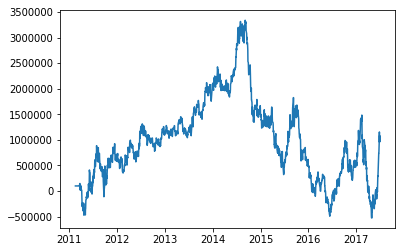

In [36]:
# 알고리즘을 적용한 결과 : 손실폭이 적다
plt.plot(result.index, result.portfolio_value)
plt.show()

### 4 유가증권/ 코스닥 조건 적용
<p>국내 매도시 0.33% 세금과 수수료가 부가</p></br>
  1. 매수/ 매도시 거래금액의 0.165% 을 수수료로 차감
  2. 초기 투자자금을 지정 (1억)

In [40]:
from zipline.api import set_commission, commission
from zipline.utils.factory import create_simulation_parameters

def initialize(context):
    context.i = 0
    context.sym = symbol('Close')
    # set_commission() 수수료 비율을 설정 : 기본 $ 달러를 '원'으로 인식하고 적용
    set_commission(commission.PerDollar(cost=0.00165)) 

def handle_data(context, data):
    order(context.sym, 1)

# 투잦 기본금을 100,000,000 으로 지정
algo = TradingAlgorithm(sim_params=create_simulation_parameters(capital_base=100000000), initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash   ending_cash  ending_value
2011-02-15 21:00:00+00:00   1.000000e+08  1.000000e+08  0.000000e+00
2011-02-16 21:00:00+00:00   1.000000e+08  9.997538e+07  2.457904e+04
2011-02-17 21:00:00+00:00   9.997538e+07  9.995047e+07  4.973415e+04
2011-02-18 21:00:00+00:00   9.995047e+07  9.992537e+07  7.517730e+04
2011-02-22 21:00:00+00:00   9.992537e+07  9.990027e+07  1.002364e+05
2011-02-23 21:00:00+00:00   9.990027e+07  9.987594e+07  1.214550e+05
2011-02-24 21:00:00+00:00   9.987594e+07  9.985151e+07  1.463221e+05
2011-02-25 21:00:00+00:00   9.985151e+07  9.982617e+07  1.770939e+05
2011-02-28 21:00:00+00:00   9.982617e+07  9.979997e+07  2.093059e+05
2011-03-01 21:00:00+00:00   9.979997e+07  9.977376e+07  2.354691e+05
2011-03-02 21:00:00+00:00   9.977376e+07  9.974789e+07  2.582720e+05
2011-03-03 21:00:00+00:00   9.974789e+07  9.972130e+07  2.920201e+05
2011-03-04 21:00:00+00:00   9.972130e+07  9.969452e+07  3.208717e+05
2011-03-07 21:00:00+00:00   9.9694